Note: dataset provides includes two csv: train set and test set, but no way to actually know the test set response so I will only use the train set and partition that set into two sets later on.

PROBLEM IDENTIFICATION
The problem of this analysis is to train the models that can predict used/secondhand car prices given the predictor variables.

In [322]:
'''Import basic modules.'''
import pandas as pd
import numpy as np
from scipy import stats

'''import deprication and future, and user warnings.'''
import warnings as wrn
wrn.filterwarnings('ignore',category=DeprecationWarning)
wrn.filterwarnings('ignore',category=FutureWarning)
wrn.filterwarnings('ignore',category=UserWarning)

'''Customize Visualization using seaborn and matplotlib'''
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

'''Display markdown formatted output like bold,italic'''
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))


In [323]:
data_test = pd.read_csv('C:/Users/hp/Desktop/Data_Test (4).csv')
data_train= pd.read_csv('C:/Users/hp/Desktop/Data_Train (2).csv')
print("Dimension of data_test",data_test.shape)
data_test.head()

Dimension of data_test (1234, 11)


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


In [324]:
print("Dimension of data_train",data_train.shape)
data_train.head()

Dimension of data_train (6019, 12)


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


Let's try dropping all the rows with NaN values and check the shape of the dataframe.

In [325]:
data_clean=data_train.copy(deep = True)


In [326]:
data_clean.dropna("index", inplace = True)
data_clean = data_clean.reset_index(drop = True)
data_clean.shape

(5975, 12)

We lost only a small number of rows, so let's proceed with a clean dataframe.

In [327]:
data_clean.describe()

,Year,Kilometers_Driven,Seats,Price
count,5975.000000,5.975000e+03,5975.000000,5975.000000
mean,2013.386778,5.867431e+04,5.278828,9.501647
std,3.247238,9.155851e+04,0.808959,11.205736
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2012.000000,3.390800e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.650000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [328]:
bold('**Missing percentage in collumns of Test datasets**')
miss_percent = (data_clean.isnull().sum() / len(data_clean)) * 100
missing = pd.DataFrame({"percent":miss_percent, 'count':data_clean.isnull().sum()}).sort_values(by="percent", ascending=False)
missing.loc[missing['percent'] >= 0]

**Missing percentage in collumns of Test datasets**

,percent,count
Name,0.0,0
Location,0.0,0
Year,0.0,0
Kilometers_Driven,0.0,0
Fuel_Type,0.0,0
Transmission,0.0,0
Owner_Type,0.0,0
Mileage,0.0,0
Engine,0.0,0
Power,0.0,0


As you can see every attributes have No missing value now, this can be addressed to avoid lossing data.

In [329]:
data_clean.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


As you can see in collumn of engine, milage and power there is text with value,so we should have to remove the text part .

In [330]:
len(np.unique(list(data_clean.Name)))

1855

As unique Name values make almost a third of all datapoints, let's drop a car model and keep only car left (Maruti,Audi, BMW, etc.). It will help to avoid overfitting problem, meaning that our model won't rely too much on a Name of the car to make a prediction.

In [331]:
bold('Here we are droping car model with only Brand name')
names = list(data_clean.Name)
for i in range(len(names)):
    names[i] = names[i].split(' ', 1)[0]
data_clean.Name = names
data_clean.head()

Here we are droping car model with only Brand name

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [332]:
bold('As you could see, now we have only 31 unique car left.')
len(np.unique(list(data_clean.Name)))

As you could see, now we have only 31 unique car left.

31

The next thing we should do is to remove non-numerical parts in Milage, Engine and Power columns.

In [333]:
mileage = list(data_clean.Mileage)
engine = list(data_clean.Engine)
power = list(data_clean.Power)
for i in range(len(names)):
    mileage[i] = mileage[i].split(' ', 1)[0]
    engine[i] = engine[i].split(' ', 1)[0]
    power[i] = power[i].split(' ', 1)[0]
data_clean.Mileage = mileage
data_clean.Engine = engine
data_clean.Power = power
data_clean.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74


Now, First we have to convert numerical data to numerical type.

In [334]:
data_clean["Price"] = data_clean["Price"].astype(float)
data_clean["Kilometers_Driven"] = data_clean["Kilometers_Driven"].astype(float)
data_clean["Mileage"] = data_clean["Mileage"].astype(float)
data_clean["Engine"] = data_clean["Engine"].astype(float)
data_clean.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai,Pune,2015,41000.0,Diesel,Manual,First,19.67,1582.0,126.2,5.0,12.50
2,Honda,Chennai,2011,46000.0,Petrol,Manual,First,18.20,1199.0,88.7,5.0,4.50
3,Maruti,Chennai,2012,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.8,5.0,17.74


In [335]:
bold('*Here Power has String datatype so, first we have to convert it to Float*')
(data_clean.dtypes)

*Here Power has String datatype so, first we have to convert it to Float*

Name                  object
Location              object
Year                   int64
Kilometers_Driven    float64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                 object
Seats                float64
Price                float64
dtype: object

In [336]:
idx = []
lt = list(data_clean["Power"])
for i in range(len(lt)):   
    if( lt[i] == "null"):
        idx.append(i)
data_clean = data_clean.drop(idx)
data_clean = data_clean.reset_index(drop = True)

In [337]:
data_clean["Power"] = data_clean["Power"].astype(float)

In [338]:
(data_clean.dtypes)

Name                  object
Location              object
Year                   int64
Kilometers_Driven    float64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

In [339]:
np.unique(list(data_clean.Name))
np.unique(list(data_clean.Name))
np.unique(list(data_clean.Name))
np.unique(list(data_clean.Fuel_Type))
np.unique(list(data_clean.Transmission))
np.unique(list(data_clean.Owner_Type))
np.unique(list(data_clean.Seats))

array([ 2.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [340]:
data_clean.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai,Pune,2015,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda,Chennai,2011,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti,Chennai,2012,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [341]:
(data_clean.dtypes)

Name                  object
Location              object
Year                   int64
Kilometers_Driven    float64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

As you can see Year and Seats columns are int64 type. Let's convert the columns to the categorical type.

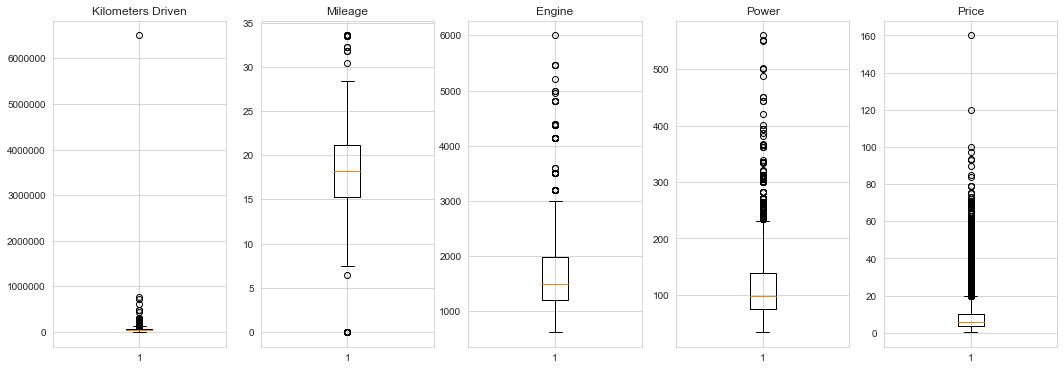

In [342]:
fig, ax = plt.subplots(1,5, figsize=(18, 6))
ax[0].boxplot(list(data_clean.Kilometers_Driven))
ax[0].set_title("Kilometers Driven")

ax[1].boxplot(data_clean.Mileage)
ax[1].set_title("Mileage")

ax[2].boxplot(data_clean.Engine)
ax[2].set_title("Engine")
    
ax[3].boxplot(list(data_clean.Power))
ax[3].set_title("Power")
    
ax[4].boxplot(list(data_clean.Price))
ax[4].set_title("Price")
    
plt.show()

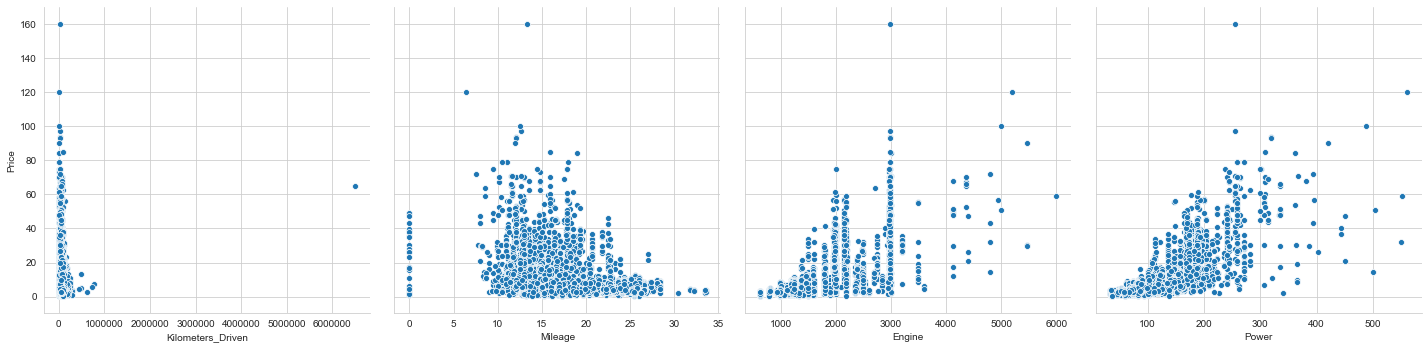

In [343]:
sns.pairplot(data=data_clean, x_vars=['Kilometers_Driven', 'Mileage', 'Engine', 'Power'], y_vars = 'Price', size=5)

There is one noticeable outlier, the one whire Kilimeters Drive is more than 6000000. Let's remove this value from the dataframe.

In [344]:
idx = []
lt = list(data_clean["Kilometers_Driven"])
for i in range(len(lt)):   
    if( lt[i] > 1000000):
        idx.append(i)
data_clean = data_clean.drop(idx)
data_clean = data_clean.reset_index(drop = True)

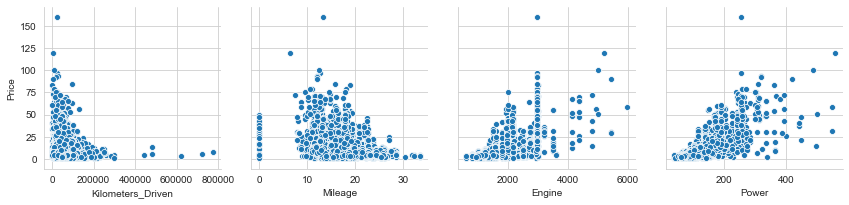

In [345]:
sns.pairplot(data=data_clean, x_vars=['Kilometers_Driven', 'Mileage', 'Engine', 'Power'], y_vars = 'Price', size=3)

Now it seems that there is no more outliers, so we could start creating our model.

First, let's create normalized training and test data

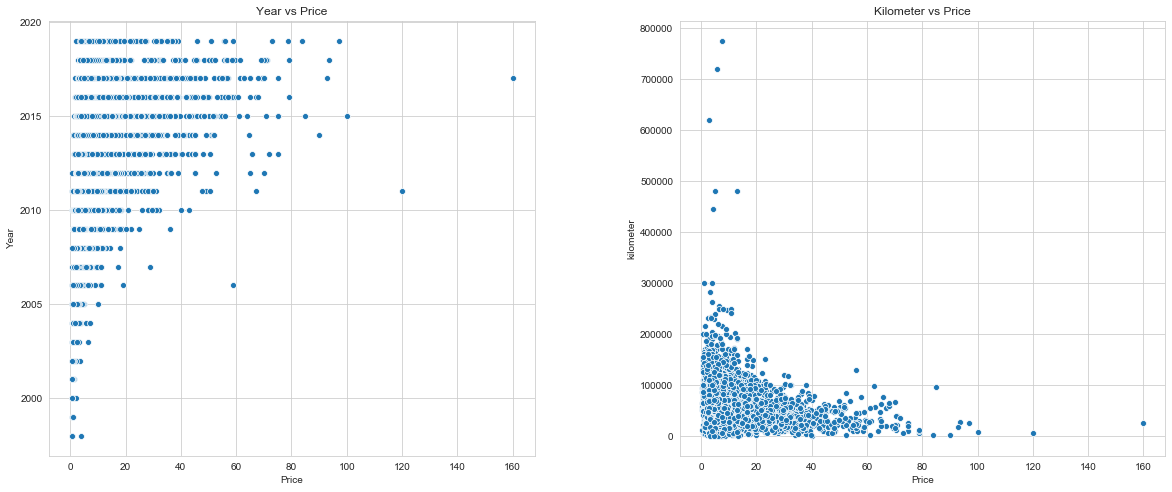

In [346]:
fig = plt.figure(figsize=(20,8))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

ax1 = fig.add_subplot(1,2,1)
sns.scatterplot(x='Price', y="Year", data=data_clean)
ax1.set_xlabel('Price')
ax1.set_ylabel('Year')
ax1.set_title('Year vs Price')

ax2 = fig.add_subplot(1,2,2)
sns.scatterplot(x='Price', y='Kilometers_Driven', data=data_clean)
ax2.set_ylabel('kilometer')
ax2.set_xlabel('Price')
ax2.set_title('Kilometer vs Price')
plt.show()


In [347]:
data_clean.drop(data_clean[data_clean['Kilometers_Driven'] >= 6500000].index, axis=0, inplace=True)

deleted a outlier row from training data.

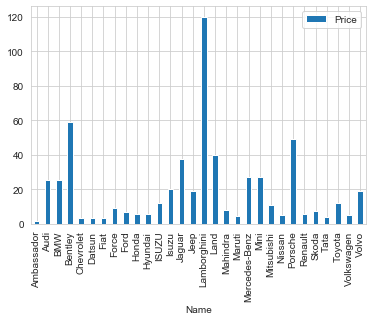

In [348]:
df_vis_1 = pd.DataFrame(data_clean.groupby('Name')['Price'].mean())
df_vis_1.plot.bar()
plt.show()

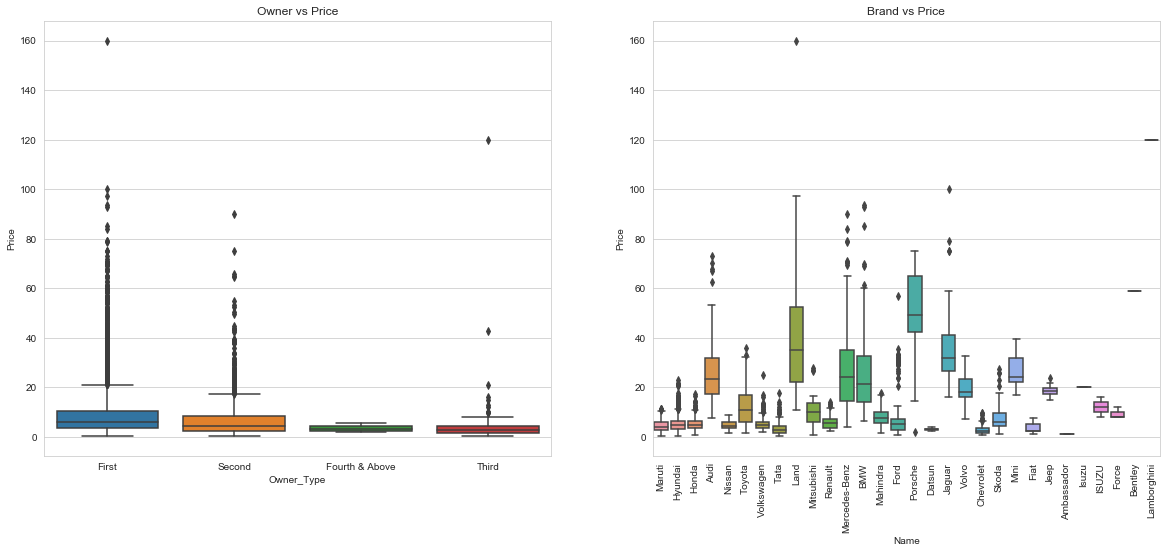

In [349]:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(1,2,1)
sns.boxplot(x='Owner_Type', y='Price', data=data_clean)
ax1.set_title('Owner vs Price')

ax2 = fig.add_subplot(1,2,2)
sns.boxplot(x='Name', y='Price', data=data_clean)
loc,labels = plt.xticks()
ax2.set_xticklabels(labels, rotation=90)
ax2.set_title('Brand vs Price')
plt.show()

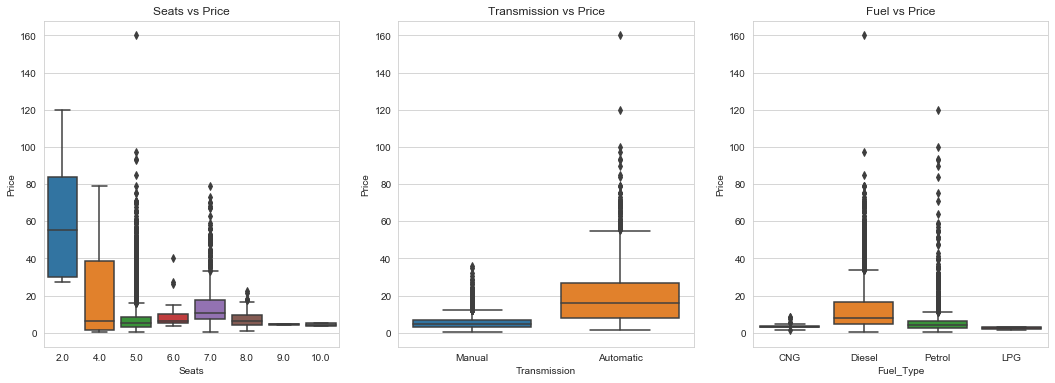

In [350]:

fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(1,3,1)
sns.boxplot(x='Seats', y='Price', data=data_clean)
ax1.set_title('Seats vs Price')

ax2 = fig.add_subplot(1,3,2)
sns.boxplot(x='Transmission', y='Price', data=data_clean)
ax2.set_title('Transmission vs Price')

ax3 = fig.add_subplot(1,3,3)
sns.boxplot(x='Fuel_Type', y='Price', data=data_clean)
ax3.set_title('Fuel vs Price')

plt.show()

In [351]:
data_clean['Year'] = pd.Categorical(data_clean['Year'])
data_clean['Seats'] = pd.Categorical(data_clean['Seats'])

In [352]:
data_clean = pd.get_dummies(data_clean, prefix_sep='_', drop_first=True)

In [353]:
y = data_clean[["Price"]].to_numpy()
data_clean = data_clean.drop(columns = ["Price"])

In [355]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing
x = data_clean.values
columns = data_clean.columns
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data_clean = pd.DataFrame(x_scaled)
data_clean.columns = columns

In [357]:
X = data_clean.to_numpy()

In [358]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, test_size=0.15, random_state=1)

Now, let's fit the model and check accuracy on the training data

In [359]:
lm = LinearRegression(fit_intercept=True, normalize=True, copy_X=True)
lm.fit(X_train, y_train)
print('Training accuracy (the coefficient of determination): {:.3f}'.format(lm.score(X_train, y_train)))

Training accuracy (the coefficient of determination): 0.798


In [360]:
prediction = lm.predict(X_test)

In [361]:
print('Testing accuracy by using score function: {:.3f}'.format(lm.score(X_test, y_test)))
print('Testing accuracy by using r2_score meric: {:.3f}'.format(r2_score(y_test, lm.predict(X_test))))

Testing accuracy by using score function: 0.792
Testing accuracy by using r2_score meric: 0.792


As you can see, testing accuracy is very similar to training accuracy, so we could say that the model didn't overfit the training data. Let's use a more intuitive metric - mean absolute error - to evaluate the performance of the model.

In [363]:
mean_absolute_error(y_test, prediction)

2.744462701233591

Our model performs quite well. On average, it will misprice a car by around 2.74 INR Lakhs. 